In [1]:
import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay






In [2]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# load json and create model
json_file = open('emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("emotion_model.h5")
print("Loaded model from disk")

# Initialize image data generator with rescaling
test_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
test_generator = test_data_gen.flow_from_directory(
        'Data2/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Loaded model from disk
Found 7178 images belonging to 7 classes.


113/113 [==============================] - 19s 169ms/step
-----------------------------------------------------------------
[[130  11 127 230 179 163 118]
 [ 14   0  13  26  15  28  15]
 [151  17 109 261 183 193 110]
 [262  15 213 441 346 299 198]
 [139  16 142 331 257 183 165]
 [165  18 146 326 249 200 143]
 [114   7  92 222 147 160  89]]


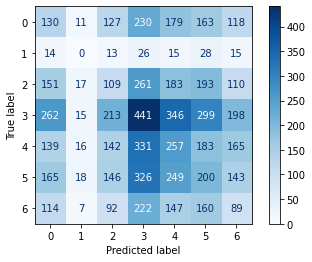

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.13      0.14      0.13       958
           1       0.00      0.00      0.00       111
           2       0.13      0.11      0.12      1024
           3       0.24      0.25      0.24      1774
           4       0.19      0.21      0.20      1233
           5       0.16      0.16      0.16      1247
           6       0.11      0.11      0.11       831

    accuracy                           0.17      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.17      0.17      7178



In [4]:

# do prediction on test data
predictions = emotion_model.predict(test_generator)

# see predictions
# for result in predictions:
#     max_index = int(np.argmax(result))
#     print(emotion_dict[max_index])

print("-----------------------------------------------------------------")
# confusion matrix
c_matrix = confusion_matrix(test_generator.classes, predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print("-----------------------------------------------------------------")
print(classification_report(test_generator.classes, predictions.argmax(axis=1)))

In [5]:
predictions.shape

(7178, 7)

In [8]:
predictions[0]

array([2.8945938e-01, 1.5923802e-05, 1.6962744e-02, 8.7087430e-02,
       3.0776361e-01, 2.9862067e-01, 9.0207774e-05], dtype=float32)